In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="whitegrid", font_scale=1.5)
plt.rcParams['lines.markersize'] = 7

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

from config import *
from src.utils.datasets import load_task

In [2]:
feature_set = ["morgan"]
X, X_names, y, smis = load_task(data_dir, name, feature_set, mask_inputs=True)

df = pd.DataFrame(X)
df.columns = X_names
df["anti-haze2"] = y

Masking 0 feature dims for ['morgan']


In [4]:
y.min()

-53.52112676056339

# Distribution of outcome

<Axes: xlabel='anti-haze2', ylabel='Count'>

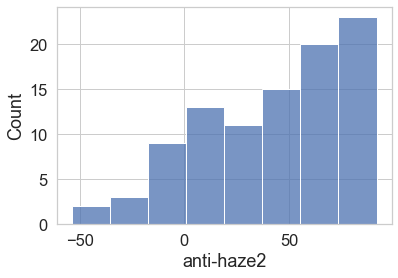

In [5]:
sns.histplot(x="anti-haze2", data=df)

# Simple model using properties and morgan dsc

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_true = y_test

R2 score: 0.15992291475668396


[Text(0.5, 0, 'y_true'), Text(0, 0.5, 'y_pred')]

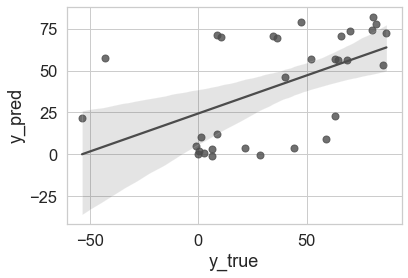

In [9]:
print("R2 score:", r2_score(y_true, y_pred))
pt = sns.regplot(x = y_true, y = y_pred, color=".3")
pt.set(xlabel="y_true", ylabel='y_pred')

# Simple model using properties and mordred dsc

In [34]:
feature_set = ["mordred"]
X, X_names, y, smis = load_task(data_dir, name, feature_set, mask_inputs=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_true = y_test

Masking 0 feature dims for ['mordred']


R2 score: 0.32703775036619276


[Text(0.5, 0, 'y_true'), Text(0, 0.5, 'y_pred')]

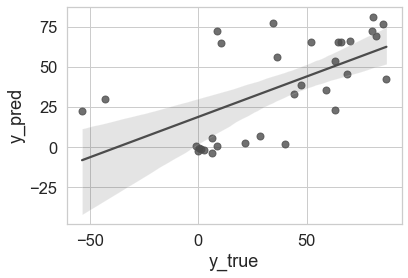

In [35]:
print("R2 score:", r2_score(y_true, y_pred))
pt = sns.regplot(x = y_true, y = y_pred, color=".3")
pt.set(xlabel="y_true", ylabel='y_pred')

# Simple model using properties and mordred+morgan dsc

In [22]:
feature_set = ["mordred", "morgan"]
X, X_names, y, smis = load_task(data_dir, name, feature_set, mask_inputs=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_true = y_test

Masking 0 feature dims for ['mordred', 'morgan']


R2 score: 0.19794427744709342


[Text(0.5, 0, 'y_true'), Text(0, 0.5, 'y_pred')]

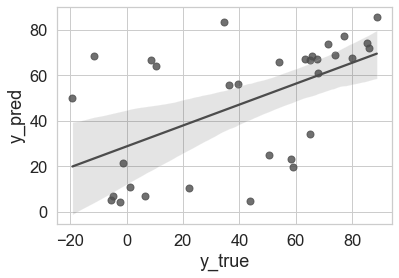

In [23]:
print("R2 score:", r2_score(y_true, y_pred))
pt = sns.regplot(x = y_true, y = y_pred, color=".3")
pt.set(xlabel="y_true", ylabel='y_pred')